In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import xmitgcm

<xarray.Dataset>
Dimensions:  (XC: 1200, YC: 1, XG: 1200, YG: 1, Z: 20, Zp1: 21, Zu: 20, Zl: 20,
              time: 50)
Coordinates: (12/40)
  * XC       (XC) float64 50.0 150.0 250.0 ... 6.339e+05 6.473e+05 6.611e+05
  * YC       (YC) float64 50.0
  * XG       (XG) float64 1.819e-12 100.0 200.0 ... 6.405e+05 6.542e+05
  * YG       (YG) float64 0.0
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 ... -165.6 -176.4 -187.5 -198.9
  * Zp1      (Zp1) float64 0.0 -10.0 -20.0 -30.0 ... -170.9 -181.8 -193.1 -204.7
    ...       ...
    dxF      (YC, XC) float64 dask.array<chunksize=(1, 1200), meta=np.ndarray>
    dyU      (YG, XG) float64 dask.array<chunksize=(1, 1200), meta=np.ndarray>
    rSurfW   (YC, XG) float64 dask.array<chunksize=(1, 1200), meta=np.ndarray>
    dyF      (YC, XC) float64 dask.array<chunksize=(1, 1200), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 2 days 01:00:00
Data variables:
    UVEL     (time, Z, YC, XG) float64 dask.array<chunksize=(1, 20, 1, 1200), meta=np.ndarray>
    WVEL     (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 20, 1, 1200), meta=np.ndarray>
    THETA    (time, Z, YC, XC) float64 dask.array<chunksize=(1, 20, 1, 1200), meta=np.ndarray>
    SALT     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 20, 1, 1200), meta=np.ndarray>
    PHIHYD   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 20, 1, 1200), meta=np.ndarray>
    TRAC01   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 20, 1, 1200), meta=np.ndarray>
    TRAC02   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 20, 1, 1200), meta=np.ndarray>
    ETAN     (time, YC, XC) float64 dask.array<chunksize=(1, 1, 1200), meta=np.ndarray>
    PHIBOT   (time, YC, XC) float64 dask.array<chunksize=(1, 1, 1200), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='../results/Fj...

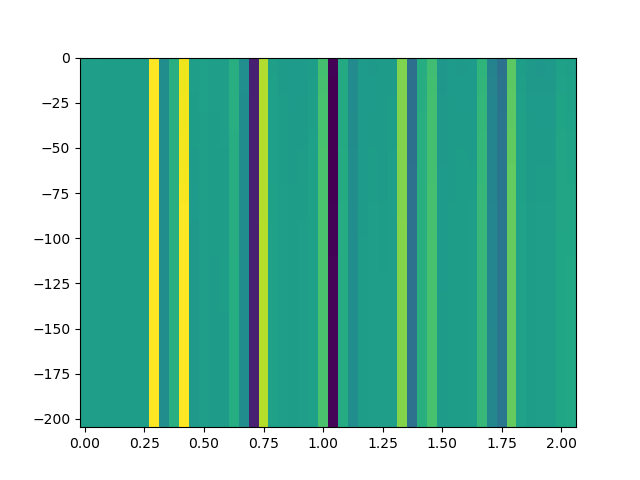

In [14]:
runname = 'Fjord2'
with xmitgcm.open_mdsdataset(f'../results/{runname}/input/',
                             endian='<', prefix=['spinup', 'spinup2d']) as ds0:
    display(ds0)
    fig, axs = plt.subplots()
    axs.pcolormesh(ds0.time.astype('float')/1e9/24/3600, ds0.Z, ds0.isel(YC=0).sel(XG=100_000, method='nearest').UVEL.T)
                                     

In [3]:
df = pd.read_excel('../HenriettaWeatherStationDataNov2019_Feb2020.xlsx', sheet_name="Final", header=75 )

In [4]:
df['Wind']
wind = df['Wind'][1:]
df['date'] = df['Unnamed: 0'][1:]
df['time'] = df['Unnamed: 1'][1:]

df['date'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['time'].astype(str))



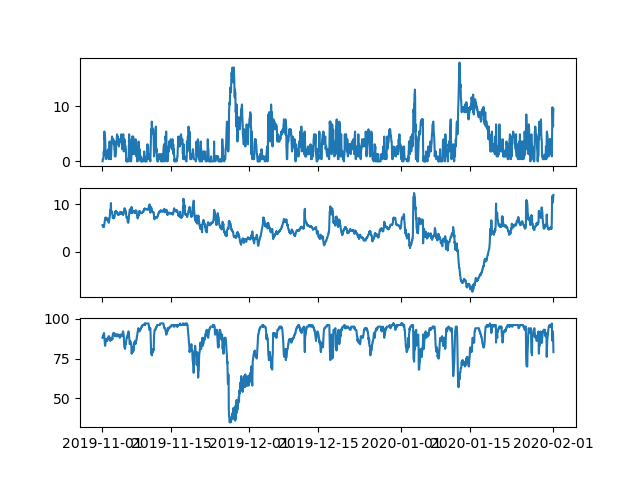

In [5]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(df['date'][1:], df['Wind'][1:])
ax[1].plot(df['date'][1:], df['Temp'][1:])
ax[2].plot(df['date'][1:], df['Out'][1:])

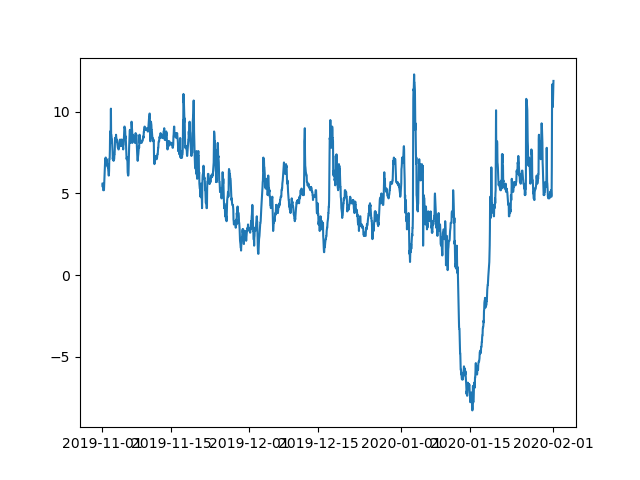

In [6]:
fig, ax = plt.subplots()
ax.plot(df['date'][1:], df['Temp'][1:])